# **3η εργαστηριακή άσκηση**
## Link prediction - Πρόβλεψη συνδέσμων
### Βασιλάκος Μιχαήλ 
###Α.Μ.: 03117069

## Imports

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

filepath = '/content/drive/MyDrive/sna-data/out.dbpedia-similar'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων**
* <B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
<B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR>

In [3]:
G = nx.read_edgelist(filepath, comments='%')
list(G.edges(data=True))

[('1', '2', {}),
 ('1', '3', {}),
 ('1', '4', {}),
 ('1', '5', {}),
 ('2', '3', {}),
 ('3', '4', {}),
 ('3', '5', {}),
 ('3', '6', {}),
 ('4', '6', {}),
 ('5', '6', {}),
 ('5', '46', {}),
 ('5', '47', {}),
 ('5', '48', {}),
 ('6', '32', {}),
 ('6', '46', {}),
 ('6', '47', {}),
 ('6', '48', {}),
 ('6', '49', {}),
 ('32', '20', {}),
 ('32', '21', {}),
 ('32', '28', {}),
 ('32', '42', {}),
 ('32', '54', {}),
 ('32', '147', {}),
 ('32', '251', {}),
 ('32', '312', {}),
 ('7', '8', {}),
 ('8', '9', {}),
 ('8', '10', {}),
 ('9', '168', {}),
 ('9', '184', {}),
 ('10', '185', {}),
 ('168', '167', {}),
 ('168', '169', {}),
 ('168', '170', {}),
 ('11', '12', {}),
 ('11', '13', {}),
 ('11', '14', {}),
 ('12', '14', {}),
 ('12', '15', {}),
 ('14', '16', {}),
 ('15', '113', {}),
 ('15', '161', {}),
 ('15', '162', {}),
 ('15', '163', {}),
 ('113', '108', {}),
 ('113', '110', {}),
 ('161', '162', {}),
 ('161', '163', {}),
 ('162', '163', {}),
 ('17', '18', {}),
 ('17', '19', {}),
 ('19', '20', {}),
 (

Παρατηρούμε πως αρχικά η ακμή (1,2) εμφανίζεται μόνο μία φορά. Θα προσπαθήσουμε να εισάγουμε τις ακμές (1,2) και (2,1) στον γράφο για να δούμε αν θα δημιουργηθούν διπλότυπες ακμές.

In [4]:
G.add_edge('1','2')
G.add_edge('2','1')
list(G.edges(data=True))

[('1', '2', {}),
 ('1', '3', {}),
 ('1', '4', {}),
 ('1', '5', {}),
 ('2', '3', {}),
 ('3', '4', {}),
 ('3', '5', {}),
 ('3', '6', {}),
 ('4', '6', {}),
 ('5', '6', {}),
 ('5', '46', {}),
 ('5', '47', {}),
 ('5', '48', {}),
 ('6', '32', {}),
 ('6', '46', {}),
 ('6', '47', {}),
 ('6', '48', {}),
 ('6', '49', {}),
 ('32', '20', {}),
 ('32', '21', {}),
 ('32', '28', {}),
 ('32', '42', {}),
 ('32', '54', {}),
 ('32', '147', {}),
 ('32', '251', {}),
 ('32', '312', {}),
 ('7', '8', {}),
 ('8', '9', {}),
 ('8', '10', {}),
 ('9', '168', {}),
 ('9', '184', {}),
 ('10', '185', {}),
 ('168', '167', {}),
 ('168', '169', {}),
 ('168', '170', {}),
 ('11', '12', {}),
 ('11', '13', {}),
 ('11', '14', {}),
 ('12', '14', {}),
 ('12', '15', {}),
 ('14', '16', {}),
 ('15', '113', {}),
 ('15', '161', {}),
 ('15', '162', {}),
 ('15', '163', {}),
 ('113', '108', {}),
 ('113', '110', {}),
 ('161', '162', {}),
 ('161', '163', {}),
 ('162', '163', {}),
 ('17', '18', {}),
 ('17', '19', {}),
 ('19', '20', {}),
 (

Βλέπουμε πως δεν δημιουργήθηκαν διπλότυπα των ακμών παρά την προσπάθειά μας. Αυτό συμβαίνει γιατί οι ακμές και οι κορυφές αναπαριστώνται με τη βοήθεια λεξικών στο networkx.

* <B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.

In [5]:
initial_node_count = G.number_of_nodes()
initial_edge_count = G.number_of_edges()
initial_mean_degree = sum([x for (_,x) in G.degree()])/initial_node_count
initial_connected_components = nx.number_connected_components(G)
print("The number of nodes in the graph is {}".format(initial_node_count))
print("The number of edges is {}".format(initial_edge_count))
print("The graph's mean degree is {:.2f}".format(initial_mean_degree))
print("The number of connected components is {}".format(initial_connected_components))

The number of nodes in the graph is 430
The number of edges is 565
The graph's mean degree is 2.63
The number of connected components is 95


* <B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.

In [6]:
A = nx.adjacency_matrix(G)
A = A.toarray()

unconnected_pairs = []

for i in range(initial_node_count):
  for j in range(i+1,initial_node_count):
    if A[i][j] == 0:
      unconnected_pairs.append((i+1, j+1))

print("The number of unconnected pairs in the graph is {}".format(len(unconnected_pairs)))

The number of unconnected pairs in the graph is 91671


* <B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.

In [7]:
df_init = nx.to_pandas_edgelist(G)
df_red = df_init.copy()

In [8]:
# removable edges: check splitting and number of nodes
removable_edges = []
removed = True

while removed:
  removed = False

  for index, row in df_red.iterrows():
    G_new = nx.from_pandas_edgelist(df_red.drop(index))
    
    if nx.number_connected_components(G_new) == initial_connected_components and G_new.number_of_nodes() == initial_node_count:
      removable_edges.append((row[0], row[1]))
      df_red.drop(index, inplace=True)
      removed = True
      break

In [9]:
print("The number of removable edges in the graph is {}".format(len(removable_edges)))

The number of removable edges in the graph is 229


* <B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable).
* <B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv).
* <B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.

In [10]:
#dataframe of removable edges (they will function as positive samples)
df_rem_edges = pd.DataFrame(removable_edges, columns=['source', 'target'])
df_rem_edges['link']=1

#dataframe of unconnected node pairs (they will function as negative samples)
df_unc_pairs = pd.DataFrame(unconnected_pairs, columns=['source', 'target'])
df_unc_pairs['link']=0

#merge in one dataframe
df_concat = pd.concat([df_rem_edges, df_unc_pairs])
df_concat

#build graph G'=G_reduced
df_reduced = df_init.loc[pd.merge(df_init, df_rem_edges, how='outer', indicator=True)._merge == 'left_only', ['source','target']]
G_reduced = nx.convert_matrix.from_pandas_edgelist(df_reduced)

reduced_node_count = G_reduced.number_of_nodes()
reduced_edge_count = G_reduced.number_of_edges()
reduced_mean_degree = sum([x for (_,x) in G_reduced.degree()])/reduced_node_count
reduced_connected_components = nx.number_connected_components(G_reduced)

print("The number of nodes in the reduced graph is {}".format(reduced_node_count))
print("The number of edges is {}".format(reduced_edge_count))
print("The mean degree is {:.2f}".format(reduced_mean_degree))
print("The number of connected components is {}".format(reduced_connected_components))

The number of nodes in the reduced graph is 430
The number of edges is 336
The mean degree is 1.56
The number of connected components is 95


## **2. Εισαγωγή σε similarity-based μετρικές για Link prediction**
* 
  * Η μετρική **Jaccard Coefficient (JC)** των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.
  * Η μετρική **Preferential Αttachment (PA)** των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.
  * Η μετρική **Resource Allocation (RA)** των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.
* <B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.</a></u> <BR><BR>
* <B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής. (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)<BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li> 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR>

In [11]:
# 2i
jc_reduced = nx.algorithms.link_prediction.jaccard_coefficient(G_reduced)

In [12]:
# 2ii
# AM = 03117069 -> k = 9
k = 9
k_greatest_jc = []
for i in range(k):
  k_greatest_jc.append(('','',-1))

for u,v,p in jc_reduced:
  if p > k_greatest_jc[0][2]:
    k_greatest_jc[0] = (u,v,p)
    k_greatest_jc = sorted(k_greatest_jc, key = lambda x : x[2])

k_greatest_jc

[('346', '343', 1.0),
 ('116', '118', 1.0),
 ('116', '114', 1.0),
 ('116', '117', 1.0),
 ('4', '47', 1.0),
 ('4', '49', 1.0),
 ('4', '46', 1.0),
 ('385', '386', 1.0),
 ('300', '265', 1.0)]

In [13]:
def JCfunction(G, threshold_jc):
  positives = []
  negatives = []

  for u in range(G.number_of_nodes()):
    for v in range(u+1, G.number_of_nodes()):
      ebunch = [(str(u+1), str(v+1))]
      jc = nx.algorithms.link_prediction.jaccard_coefficient(G,ebunch)
      for x,y,p in jc:
        if p >= threshold_jc:
          positives.append((x,y))
        else:
          negatives.append((x,y))


  tp = []
  fp = []
  tn = []
  fn = []

  for u,v in positives:
    if G.has_edge(u,v):
      tp.append((u,v))
    else:
      fp.append((u,v))

  for u,v in negatives:
    if G.has_edge(u,v):
      fn.append((u,v))
    else:
      tn.append((u,v))

  tp = len(tp)
  fp = len(fp)
  tn = len(tn)
  fn = len(fn)
  print(tp,fp,tn,fn)

  precision_jc = tp/(tp+fp) if (tp+fp) > 0 else .0
  recall_jc = tp/(tp+fn) if (tp+fn)>0 else .0
  accuracy_jc = (tp+tn)/(tp+tn+fp+fn)

  return recall_jc, precision_jc, accuracy_jc

In [14]:
thresh = [.1, .15, .25, .5, 1]
recall_jc = []
precision_jc = []
accuracy_jc = []

for th in thresh:
  rec, prec, acc = JCfunction(G_reduced, th)
  print(rec, prec, acc)
  recall_jc.append(rec)
  precision_jc.append(prec)
  accuracy_jc.append(acc)

0 505 91395 335
0.0 0.0 0.9908928281021304
0 487 91413 335
0.0 0.0 0.9910879817856562
0 448 91452 335
0.0 0.0 0.9915108147666287
0 331 91569 335
0.0 0.0 0.9927793137095463
0 247 91653 335
0.0 0.0 0.9936900308993333


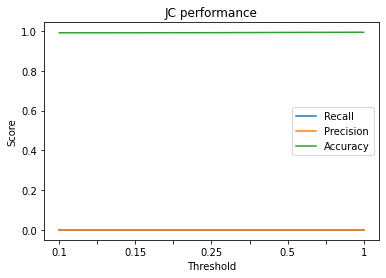

In [15]:
jc_metrics = pd.DataFrame([recall_jc, precision_jc, accuracy_jc]).transpose()
jc_metrics.rename(columns={0:'Recall', 1:'Precision', 2:'Accuracy'},
                  index={0:'0.1', 1:'0.15', 2:'0.25', 3:'0.5', 4:'1'}, inplace=True)
jc_metrics.plot()
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('JC performance')
plt.show()

Παρατηρούμε πως η επίδοση του link prediction με χρήση του JC δεν είναι άριστη, καθώς δεν έχουμε εντοπίσει σωστά ούτε ένα true positive ανεξαρτήτως της τιμής του threshold. Για τον λόγο αυτό αν και η τιμή του accuracy είναι ψηλά και μπορεί να μας ξεγελάσει πρέπει να δούμε πως οι άλλες δύο μετρικές βρίσκονται στο μηδέν.

## **3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών**  
* <B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
* <B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.

    
|       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
|-------|-------|-----------|-------------|--------------------|
|(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
|(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

**3(i)** Για να εξερευνήσουμε τη συσχέτιση μεταξύ των τιμών των μετρικών Jaccard Coefficient, Preferential Attachment και Resource Allocation για τον μειωμένο γράφο $G'$ θα υπολογίζαμε τις αντίστοιχες τιμές για κάθε μετρική και ύστερα θα δημιουργούσαμε μια λίστα από τις τιμές της κάθε μετρικής με τα ζευγάρια των κόμβων του γράφου στην ίδια σειρά. Με χρήση της συνάρτησης corrcoeff του πακέτου NumPy θα υπολογίζαμε τον συντελεστή συσχέτισης ανάμεσα σε κάθε μετρική και θα εντοπίζαμε αν υπάρχει κάποια έντονη τάση συσχέτισης ανάμεσά τους.

In [16]:
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)
df_copy = df_concat.copy()
df_copy

,source,target,link
0,1,2,1
1,1,3,1
2,1,4,1
3,3,4,1
4,3,5,1
...,...,...,...
91666,426,430,0
91667,427,428,0
91668,427,429,0
91669,427,430,0


In [17]:
# format index as requested
df_copy['index'] =  "(" + df_copy['source'].astype(str) + "," + df_copy['target'].astype(str) + ")"
df_copy.set_index('index', inplace=True)

In [18]:
# functions to calculate metrics for two nodes in the same row of the dataframe
def calc_jc(G, row):
  u = str(row['source'])
  v = str(row['target'])
  jc_generator = nx.algorithms.link_prediction.jaccard_coefficient(G,[(u,v)])
  for x,y,p in jc_generator:
    jc_score = p
  return jc_score


def calc_pa(G, row):
  u = str(row['source'])
  v = str(row['target'])
  jc_generator = nx.algorithms.link_prediction.preferential_attachment(G,[(u,v)])
  for x,y,p in jc_generator:
    jc_score = p
  return jc_score


def calc_ra(G, row):
  u = str(row['source'])
  v = str(row['target'])
  jc_generator = nx.algorithms.link_prediction.resource_allocation_index(G,[(u,v)])
  for x,y,p in jc_generator:
    jc_score = p
  return jc_score

In [19]:
df_copy['Jacc.Coeff.'] = df_copy.apply(lambda row: calc_jc(G_reduced, row), axis=1)
df_copy['Pr.Attachment'] = df_copy.apply(lambda row: calc_pa(G_reduced, row), axis=1)
df_copy['Resource Allocation'] = df_copy.apply(lambda row: calc_ra(G_reduced, row), axis=1)

In [20]:
df_copy

,source,target,link,Jacc.Coeff.,Pr.Attachment,Resource Allocation
index,,,,,,
"(1,2)",1,2,1,0.0,1,0.000000
"(1,3)",1,3,1,0.0,2,0.000000
"(1,4)",1,4,1,0.0,1,0.000000
"(3,4)",3,4,1,0.5,2,0.142857
"(3,5)",3,5,1,0.0,4,0.000000
...,...,...,...,...,...,...
"(426,430)",426,430,0,0.0,1,0.000000
"(427,428)",427,428,0,0.0,2,0.000000
"(427,429)",427,429,0,0.0,1,0.000000


In [21]:
# drop unwanted columns
df_copy.drop(['source', 'target'], axis=1, inplace=True)
df_copy

,link,Jacc.Coeff.,Pr.Attachment,Resource Allocation
index,,,,
"(1,2)",1,0.0,1,0.000000
"(1,3)",1,0.0,2,0.000000
"(1,4)",1,0.0,1,0.000000
"(3,4)",1,0.5,2,0.142857
"(3,5)",1,0.0,4,0.000000
...,...,...,...,...
"(426,430)",0,0.0,1,0.000000
"(427,428)",0,0.0,2,0.000000
"(427,429)",0,0.0,1,0.000000


* <B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.
* <B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου.
* <B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
 
# partition dataset into test and train datasets
X = df_copy.drop('link',axis=1)
y = df_copy['link']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [23]:
classifier = RandomForestClassifier()   

from sklearn.preprocessing import MinMaxScaler 

# scale data using MinMaxScaler
mm_scaler = MinMaxScaler() 
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

# declare cross validation parameters
parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]} 
model = GridSearchCV(classifier, param_grid = parameters) 

In [24]:
# fit model
model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [25]:
# get predictions from model
predictions = model.predict(X_test_scaled)
print("The first 9 predictions are: ")
print(predictions[:9])
print("The true labels are: ")
print(y_test.head(9))

The first 9 predictions are: 
[0 0 0 0 0 0 0 0 0]
The true labels are: 
index
(94,372)     0
(131,204)    0
(325,414)    0
(158,411)    0
(44,81)      0
(76,171)     0
(369,397)    0
(1,250)      0
(171,407)    0
Name: link, dtype: int64


In [26]:
print("The model's accuracy is: {:.2f}%".format(accuracy_score(y_test, predictions)*100))

The model's accuracy is: 99.75%


In [27]:
# create dataset with only (1,47) and calculate values to use with model
jc_generator = nx.algorithms.link_prediction.jaccard_coefficient(G,[('1','47')])
for x,y,p in jc_generator:
  jc_score = p
pa_generator = nx.algorithms.link_prediction.preferential_attachment(G,[('1','47')])
for x,y,p in pa_generator:
  pa_score = p
ra_generator = nx.algorithms.link_prediction.resource_allocation_index(G,[('1','47')])
for x,y,p in ra_generator:
  ra_score = p

data = {'Jacc.Coeff.':[jc_score], 'Pr.Attachment':[pa_score], 'Resource Allocation':[ra_score]}
X_proba = pd.DataFrame(data, index=['(1,47)'])
X_proba_scaled = mm_scaler.transform(X_proba)

In [28]:
# get prediction probabilities for (1,47) edge
predict_proba = model.predict_proba(X_proba_scaled)
print("The model's classes are: ", model.classes_)
print("The probability of edge (1,47) belonging to class 0 (no connection) is {:.2f}%".format(predict_proba[0][0]*100))
print("and the probability of belonging to class 1 (connection) is {:.2f}%".format(predict_proba[0][1]*100))

The model's classes are:  [0 1]
The probability of edge (1,47) belonging to class 0 (no connection) is 95.34%
and the probability of belonging to class 1 (connection) is 4.66%


## <B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
<B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
<br>Για την επιλογή των παραμέτρων: 
* p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node),
* q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node),
* dimensions - πλήθος διαστάσεων των Node2Vec embeddings, 
* num_walks - αριθμός περιπάτων από κάθε κόμβο, 
* walk_length - μήκος τυχαίου περιπάτου,
* window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, 
* num_iter - αριθμός SGD επαναλήψεων (epochs),
* workers - αριθμός workers για τον Word2Vec,
χρησιμοποιήστε τις τιμές:
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [29]:
# install node2vec
!pip install node2vec

In [30]:
from node2vec import Node2Vec
import multiprocessing

#generate walks
node2vec_walker = Node2Vec(G_reduced, dimensions=128, walk_length=80, num_walks=10, p=1.0, q=1.0, workers=multiprocessing.cpu_count())

#train node2vec model
n2v_model = node2vec_walker.fit(window=10 , min_count=1)

Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

* <B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.
* <B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου.

In [31]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
X = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(df_concat['source'], df_concat['target'])]
y = df_concat['link']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)
acc = accuracy_score(y_test, preds)
print("The model's accuracy with the use of the Node2Vec algorithm reached {:.2f}%".format(acc*100))

The model's accuracy with the use of the Node2Vec algorithm reached 99.75%


<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>